# Aggregate neighborhood stats to generate within and across-city indicators
Description: This script is for preparing all within and across city indicators
This script should be run after when the sample point stats are prepared for all cities (sp.py), use this is script to get all the final output for both within-city and across-city indicator


**Two outputs:**
1. global_indicators_hex_250m.gpkg  

|indicators | data type | description |
|---- | --- | --- |
| urban_sample_point_count | int | Count of urban sample points associated with each hexagon (judge using intersect); this must be positive.  Zero sample count hexagons are not of relevance for output |
| pct_access_500m_supermarkets | float | Percentage of sample points with pedestrian network access to supermarkets within (up to and including) 500 metres |
| pct_access_500m_convenience | float | Percentage of sample points with pedestrian network access to convenience within (up to and including) 500 metres |
| pct_access_500m_pt_any | float | Percentage of sample points with pedestrian network access to public transport within (up to and including) 500 metres |
| pct_access_500m_public_open_space | float | Percentage of sample points with pedestrian network access to public open space within (up to and including) 500 metres |
| local_nh_population_density | float | Average local neighbourhood population density |
| local_nh_intersection_density | float | Average local neighbourhood intersection density |
| local_daily_living | float | Average local neighbourhood daily living score |
| local_walkability | float | Average local neighbourhood walkability score |
| all_cities_z_nh_population_density | float | Z-score of local neighbourhood population density relative to all cities |
| all_cities_z_nh_intersection_density | float | Z-score of local neighbourhood intersection density relative to all cities |
| all_cities_z_daily_living | float | Z-score of daily living score relative to all cities |
| all_cities_walkability | float | Walkability index relative to all cities |


2. global_indicators_city.gpkg  

|indicators | data type | description |
|---- | --- | --- |
| pop_pct_access_500m_supermarkets | float | Percentage of population with pedestrian network access to supermarkets within (up to and including) 500 metres|
| pop_pct_access_500m_convenience | float | Percentage of population with pedestrian network access to convenience within (up to and including) 500 metres |
| pop_pct_access_500m_pt_any | float | Percentage of population with pedestrian network access to public transport within (up to and including) 500 metres |
| pop_pct_access_500m_public_open_space | float | Percentage of population with pedestrian network access to public open space within (up to and including) 500 metres |
| pop_nh_pop_density | float | Average local neighbourhood population density |
| pop_nh_intersection_density | float | Average local neighbourhood intersection density |
| pop_daily_living | float | Average daily living score for population (within city) |
| pop_walkability | float | Average walkability index for population (within city) |
| all_cities_pop_z_daily_living | float | Average z-score of daily living score for population relative to all cities |
| all_cities_walkability | float | Average walkability index for population relative to all cities|

In [17]:
import json
import os
import time
import pandas as pd
import geopandas as gpd
import sys
from setup_aggr import * # module for all aggregation functions used in this notebook
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
matplotlib.__version__, pd.__version__

('3.2.0', '1.0.3')

In [3]:
# get the work directory
dirname = os.path.dirname('')
jsonFile = "./configuration/" + sys.argv[1]
jsonPath = os.path.join(dirname, jsonFile)

#read configeration file for all cities (here only include vic and valencia for testing purposes)
with open("configuration/cities.json") as json_file:
    config = json.load(json_file)

# specify input and outpur location
folder = config['folder']
input_folder = config['input_folder']

# read city names from json
cites = list(config['cityNames'].values())
print("Cities:{}".format(cites))

Cities:['adelaide', 'auckland', 'baltimore', 'bangkok', 'barcelona', 'belfast', 'bern', 'chennai', 'cologne', 'ghent', 'graz', 'hanoi', 'hong_kong', 'lisbon', 'melbourne', 'mexico_city', 'odense', 'olomouc', 'phoenix', 'sao_paulo', 'seattle', 'sydney', 'valencia', 'vic']


## 1. Generate "global_indicators_hex_250m.gpkg" for hex-level indicators

In [6]:
# create the output path of "global_indicators_hex_250m.gpkg"
gpkgOutput_hex250 = os.path.join(dirname, folder,
                                 config['output_hex_250m'])

# read the input path of pre-prepared sample point of each city
gpkgInput_ori = []
for gpkg in list(config['gpkgNames'].values()):
    gpkgInput_ori.append(os.path.join(dirname, input_folder, gpkg))

print("City-specific input datasources with sample point stats are from: ")
print(gpkgInput_ori)
  
print("All within-city indicators will be saved to: ", gpkgOutput_hex250)

City-specific input datasources with sample point stats are from: 
['data/input/adelaide_au_2019_1600m_buffer.gpkg', 'data/input/auckland_nz_2019_1600m_buffer.gpkg', 'data/input/baltimore_us_2019_1600m_buffer.gpkg', 'data/input/bangkok_th_2019_1600m_buffer.gpkg', 'data/input/barcelona_es_2019_1600m_buffer.gpkg', 'data/input/belfast_gb_2019_1600m_buffer.gpkg', 'data/input/bern_ch_2019_1600m_buffer.gpkg', 'data/input/chennai_in_2019_1600m_buffer.gpkg', 'data/input/cologne_de_2019_1600m_buffer.gpkg', 'data/input/ghent_be_2019_1600m_buffer.gpkg', 'data/input/graz_at_2019_1600m_buffer.gpkg', 'data/input/hanoi_vn_2019_1600m_buffer.gpkg', 'data/input/hong_kong_hk_2019_1600m_buffer.gpkg', 'data/input/lisbon_pt_2019_1600m_buffer.gpkg', 'data/input/melbourne_au_2019_1600m_buffer.gpkg', 'data/input/mexico_city_mx_2019_1600m_buffer.gpkg', 'data/input/odense_dk_2019_1600m_buffer.gpkg', 'data/input/olomouc_cz_2019_1600m_buffer.gpkg', 'data/input/phoenix_us_2019_1600m_buffer.gpkg', 'data/input/sao_pa

In [8]:
# prepare aggregation for hexes across all cities
print("Calculate hex-level indicators weighted by sample points within each city:")

cities_hexes = []
for index, gpkgInput in enumerate(gpkgInput_ori):
    print(index, cites[index])
    city_hexes = calc_hexes_pct_sp_indicators(gpkgInput, gpkgOutput_hex250, cites[index],
               config['samplepointResult'], config['hex250'], config)
    cities_hexes.append(city_hexes)
    

Calculate hex-level indicators weighted by sample points within each city:
0 adelaide
1 auckland
2 baltimore
3 bangkok
4 barcelona
5 belfast
6 bern
7 chennai
8 cologne
9 ghent
10 graz
11 hanoi
12 hong_kong
13 lisbon
14 melbourne
15 mexico_city
16 odense
17 olomouc
18 phoenix
19 sao_paulo
20 seattle
21 sydney
22 valencia
23 vic


In [9]:
# show example of adelaide hex-level indicator dataframe
cities_hexes[0].head(3)

,index,geometry,urban_sample_point_count,pct_access_500m_supermarkets,pct_access_500m_convenience,pct_access_500m_pt_any,pct_access_500m_public_open_space,local_nh_population_density,local_nh_intersection_density,local_daily_living,local_walkability,study_region
1,37242,"MULTIPOLYGON (((411098.000 -3963684.000, 41116...",38,36.842105,94.736842,31.578947,100.0,2721.111193,74.939931,1.631579,-0.664189,adelaide
2,39572,"MULTIPOLYGON (((408680.000 -3962267.000, 40874...",120,49.166667,100.000000,100.000000,100.0,1910.241560,104.960014,2.491667,1.030021,adelaide
3,41521,"MULTIPOLYGON (((407564.000 -3961177.000, 40762...",56,69.642857,94.642857,91.071429,100.0,2292.377034,103.940942,2.553571,1.497289,adelaide


In [10]:
# prepare all_cities level fields for every hex across all cities
print("Calculate hex-level indicators zscores relative to all cities.\n" 
      "Check", [gpkgOutput_hex250], "for output indicators of each city" )

calc_hexes_zscore_walk(gpkgOutput_hex250, cites, config)

Calculate hex-level indicators zscores relative to all cities.
Check ['data/output/global_indicators_hex_250m.gpkg'] for output indicators of each city


In [11]:
# check the hex layer for within-city indicators
hex250 = gpd.read_file(gpkgOutput_hex250, layer=config["cityNames"]['phoenix'])
hex250.columns

Index(['index', 'local_daily_living', 'local_nh_intersection_density',
       'local_nh_population_density', 'local_walkability',
       'pct_access_500m_convenience', 'pct_access_500m_pt_any',
       'pct_access_500m_public_open_space', 'pct_access_500m_supermarkets',
       'study_region', 'urban_sample_point_count',
       'all_cities_z_nh_population_density',
       'all_cities_z_nh_intersection_density', 'all_cities_z_daily_living',
       'all_cities_walkability', 'geometry'],
      dtype='object')

Text(0.5, 0.95, 'Local walkability')

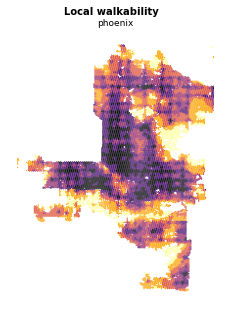

In [26]:
col='local_walkability'

fig, ax = plt.subplots(figsize=(5, 5))

#plot indicators
ax = hex250.plot(ax=ax, column=col, scheme='NaturalBreaks', k=6, cmap='inferno_r', edgecolor='none')

ax.set_title(config["cityNames"]['phoenix'], fontsize=9)
ax.set_axis_off()

# add a title to the figure
fig.suptitle('Local walkability', y=0.95, fontsize=10, weight='bold')

## 2. Generate "global_indicators_city.gpkg" for city-level indicators

In [27]:
# create the path of "global_indicators_city.gpkg"
gpkgOutput_cities = os.path.join(dirname, folder,
                                 config['global_indicators_city'])
print("All accross-city indicators will be saved to: ", gpkgOutput_cities)

All accross-city indicators will be saved to:  data/output/global_indicators_city.gpkg


In [28]:
# prepare aggregation for study region across all cities
print("Calculate city-level indicators weighted by population:")

cities_all = []
for index, gpkgInput in enumerate(gpkgInput_ori):
    print(index, cites[index])
    city = calc_cities_pop_pct_indicators(gpkgOutput_hex250, cites[index], gpkgInput, config,
              gpkgOutput_cities)
    cities_all.append(city)


Calculate city-level indicators weighted by population:
0 adelaide
1 auckland
2 baltimore
3 bangkok
4 barcelona
5 belfast
6 bern
7 chennai
8 cologne
9 ghent
10 graz
11 hanoi
12 hong_kong
13 lisbon
14 melbourne
15 mexico_city
16 odense
17 olomouc
18 phoenix
19 sao_paulo
20 seattle
21 sydney
22 valencia
23 vic


In [29]:
cities_all[0] # show city indicator dataframe of index 0, city of Adelaide

,Study region,geometry,urban_sample_point_count,pop_pct_access_500m_supermarkets,pop_pct_access_500m_convenience,pop_pct_access_500m_pt_any,pop_pct_access_500m_public_open_space,pop_nh_pop_density,pop_nh_intersection_density,pop_daily_living,pop_walkability,all_cities_pop_z_daily_living,all_cities_walkability
0,Adelaide,"MULTIPOLYGON (((406002.653 -3963049.835, 40599...",348406,18.836261,20.282443,88.549059,91.956205,3428.992575,83.165534,1.276678,0.173385,0.418436,-0.248834


In [33]:
cities_ind = gpd.GeoDataFrame()
for i in range(len(cities_all)):
    city_ind = cities_all[i]
    cities_ind = cities_ind.append(city_ind, ignore_index=True)

In [35]:
#correct vic study region column
cities_ind['Study region'] = cities_ind['Study region'].fillna('Vic')

# show city-level indicators sorted by walkability index relative to all cities
cities_ind.sort_values('all_cities_walkability')

,Study region,geometry,urban_sample_point_count,pop_pct_access_500m_supermarkets,pop_pct_access_500m_convenience,pop_pct_access_500m_pt_any,pop_pct_access_500m_public_open_space,pop_nh_pop_density,pop_nh_intersection_density,pop_daily_living,pop_walkability,all_cities_pop_z_daily_living,all_cities_walkability,city,area_sqkm
14,Melbourne,"MULTIPOLYGON (((975572.896 -4336975.314, 97558...",1038649,20.343380,29.718035,46.300109,91.157435,4391.331597,85.699505,0.963615,0.259321,0.086218,-0.434353,NaN,NaN
21,Sydney,"MULTIPOLYGON (((1583629.798 -3922551.514, 1583...",673256,21.907671,27.934495,60.562907,93.567663,6352.109092,75.777919,1.104051,0.479576,0.235246,-0.423386,NaN,NaN
18,Phoenix,"MULTIPOLYGON (((377030.203 3709132.952, 377041...",495546,5.437286,21.833525,60.558224,53.837341,3936.523950,91.243812,0.878290,0.407138,-0.004328,-0.398935,NaN,NaN
0,Adelaide,"MULTIPOLYGON (((406002.653 -3963049.835, 40599...",348406,18.836261,20.282443,88.549059,91.956205,3428.992575,83.165534,1.276678,0.173385,0.418436,-0.248834,NaN,NaN
1,Auckland,"MULTIPOLYGON (((1762196.420 5904464.810, 17622...",229905,31.928225,48.439553,89.634015,95.020956,4625.119302,71.571746,1.700018,-0.005775,0.867679,-0.044330,NaN,NaN
9,Ghent,"MULTIPOLYGON (((555279.826 5669224.413, 555242...",65790,37.887051,30.853683,76.632561,93.867927,2537.838499,87.596642,1.453733,-0.627464,0.606325,-0.000461,NaN,NaN
23,Vic,"MULTIPOLYGON (((430884.105 4642373.153, 431065...",12316,52.024641,45.077124,60.126813,71.271968,3921.179614,82.801512,1.572286,0.838671,0.732131,0.091805,Vic,30.580118
3,Bangkok,"MULTIPOLYGON (((674339.840 1543299.664, 674382...",712517,15.518546,32.863172,20.217992,35.943933,20614.377136,93.006263,0.685997,0.637510,-0.208388,0.718315,NaN,NaN
20,Seattle,"POLYGON ((543724.936 5291779.147, 544800.107 5...",400831,27.663808,39.158787,70.120671,89.138973,3956.506051,113.371121,1.369433,0.312024,0.516866,0.764752,NaN,NaN
17,Olomouc,"POLYGON ((666394.618 5496602.027, 666387.490 5...",28336,41.653836,46.087188,90.976197,95.688968,3314.984825,104.722851,1.787172,-0.756381,0.960166,0.908674,NaN,NaN
